In [1]:

import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.circuit import Parameter
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


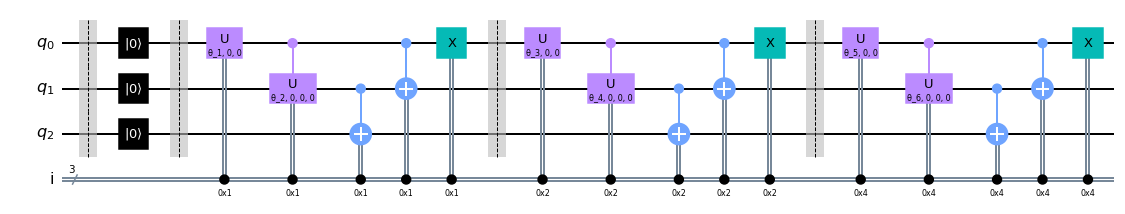

In [12]:
theta1 = Parameter('θ_1')
theta2 = Parameter('θ_2')
theta3 = Parameter('θ_3')
theta4 = Parameter('θ_4')
theta5 = Parameter('θ_5')
theta6 = Parameter('θ_6')
theta=[theta1,theta2,theta3,theta4,theta5,theta6]
qreg_q = QuantumRegister(3, 'q')
creg_I = ClassicalRegister(3, 'i')
circuit = QuantumCircuit(qreg_q,creg_I)
circuit.barrier(qreg_q)
circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.barrier(qreg_q)
circuit.u(theta[0], 0, 0, qreg_q[0]).c_if(creg_I, 1)
circuit.cu(theta[1], 0, 0, 0, qreg_q[0], qreg_q[1]).c_if(creg_I, 1)
circuit.cx(qreg_q[1], qreg_q[2]).c_if(creg_I, 1)
circuit.cx(qreg_q[0], qreg_q[1]).c_if(creg_I, 1)
circuit.x(qreg_q[0]).c_if(creg_I, 1)
circuit.barrier(qreg_q)
circuit.u(theta[2], 0, 0, qreg_q[0]).c_if(creg_I, 2)
circuit.cu(theta[3], 0, 0, 0, qreg_q[0], qreg_q[1]).c_if(creg_I, 2)
circuit.cx(qreg_q[1], qreg_q[2]).c_if(creg_I, 2)
circuit.cx(qreg_q[0], qreg_q[1]).c_if(creg_I, 2)
circuit.x(qreg_q[0]).c_if(creg_I, 2)
circuit.barrier(qreg_q)
circuit.u(theta[4], 0, 0, qreg_q[0]).c_if(creg_I, 4)
circuit.cu(theta[5], 0, 0, 0, qreg_q[0], qreg_q[1]).c_if(creg_I, 4)
circuit.cx(qreg_q[1], qreg_q[2]).c_if(creg_I, 4)
circuit.cx(qreg_q[0], qreg_q[1]).c_if(creg_I, 4)
circuit.x(qreg_q[0]).c_if(creg_I, 4)
circuit.draw('mpl')

In [3]:
def Three_Edge_Uniform_Level(theta):
    qreg_q = QuantumRegister(3, 'q')
    creg_I = ClassicalRegister(3, 'i')
    circuit = QuantumCircuit(qreg_q,creg_I)
    circuit.barrier(qreg_q)
    circuit.reset(qreg_q[0])
    circuit.reset(qreg_q[1])
    circuit.reset(qreg_q[2])
    circuit.barrier(qreg_q)
    circuit.u(theta[0], 0, 0, qreg_q[0]).c_if(creg_I, 1)
    circuit.cu(theta[1], 0, 0, 0, qreg_q[0], qreg_q[1]).c_if(creg_I, 1)
    circuit.cx(qreg_q[1], qreg_q[2]).c_if(creg_I, 1)
    circuit.cx(qreg_q[0], qreg_q[1]).c_if(creg_I, 1)
    circuit.x(qreg_q[0]).c_if(creg_I, 1)
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
    circuit.u(theta[2], 0, 0, qreg_q[0]).c_if(creg_I, 2)
    circuit.cu(theta[3], 0, 0, 0, qreg_q[0], qreg_q[1]).c_if(creg_I, 2)
    circuit.cx(qreg_q[1], qreg_q[2]).c_if(creg_I, 2)
    circuit.cx(qreg_q[0], qreg_q[1]).c_if(creg_I, 2)
    circuit.x(qreg_q[0]).c_if(creg_I, 2)
    circuit.u(theta[4], 0, 0, qreg_q[0]).c_if(creg_I, 4)
    circuit.cu(theta[5], 0, 0, 0, qreg_q[0], qreg_q[1]).c_if(creg_I, 4)
    circuit.cx(qreg_q[1], qreg_q[2]).c_if(creg_I, 4)
    circuit.cx(qreg_q[0], qreg_q[1]).c_if(creg_I, 4)
    circuit.x(qreg_q[0]).c_if(creg_I, 4)
    sub=circuit.to_instruction()
    return sub

In [4]:
reg0 = ClassicalRegister(3, 'l0')
reg1 = ClassicalRegister(3, 'l1')
reg2 = ClassicalRegister(3, 'l2')
reg3 = ClassicalRegister(3, 'l3')
qreg_q = QuantumRegister(3, 'q')
theta_1=[1.570796327,2.094395102,1.910633236,1.570796327,0,0]
theta_0=[1.570796327,0,0,0,0,0]
main = QuantumCircuit(qreg_q, reg0,reg1,reg2)
level_1=Three_Edge_Uniform_Level(theta_0)
level_2=Three_Edge_Uniform_Level(theta_1)
print(level_1)

Instruction(name='circuit-89', num_qubits=3, num_clbits=3, params=[])


In [5]:
main.x(qreg_q[0])
main.measure(qreg_q[0],reg0[0])
main.reset(qreg_q[0])
main.append(level_1, [qreg_q[0], qreg_q[1], qreg_q[2]],[reg0[0],reg0[1],reg0[2]])
main.measure(qreg_q[0], reg1[0])
main.measure(qreg_q[2], reg1[2])
main.measure(qreg_q[1], reg1[1])
main.reset(qreg_q[1])
main.reset(qreg_q[2])
main.reset(qreg_q[0])
main.append(level_2, [qreg_q[0], qreg_q[1], qreg_q[2]],[reg1[0],reg1[1],reg1[2]])
main.measure(qreg_q[0], reg2[0])
main.measure(qreg_q[2], reg2[2])
main.measure(qreg_q[1], reg2[1])


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:321: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  self._get_layer_widths()


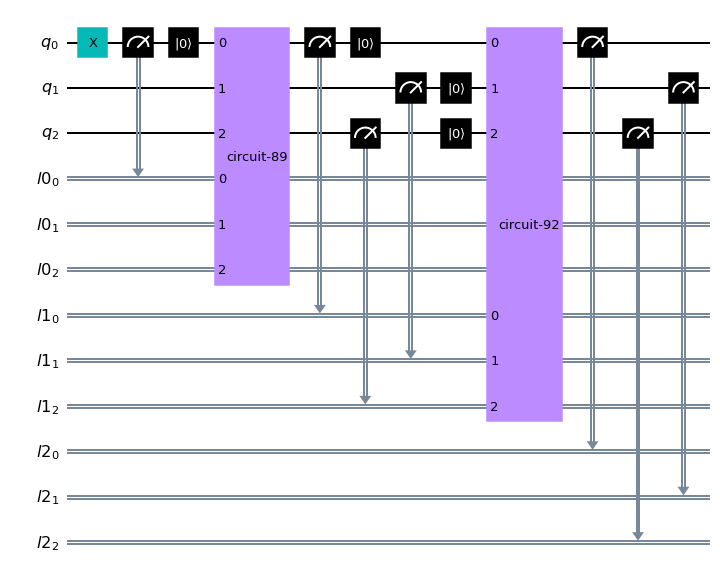

In [6]:
main.draw('mpl')


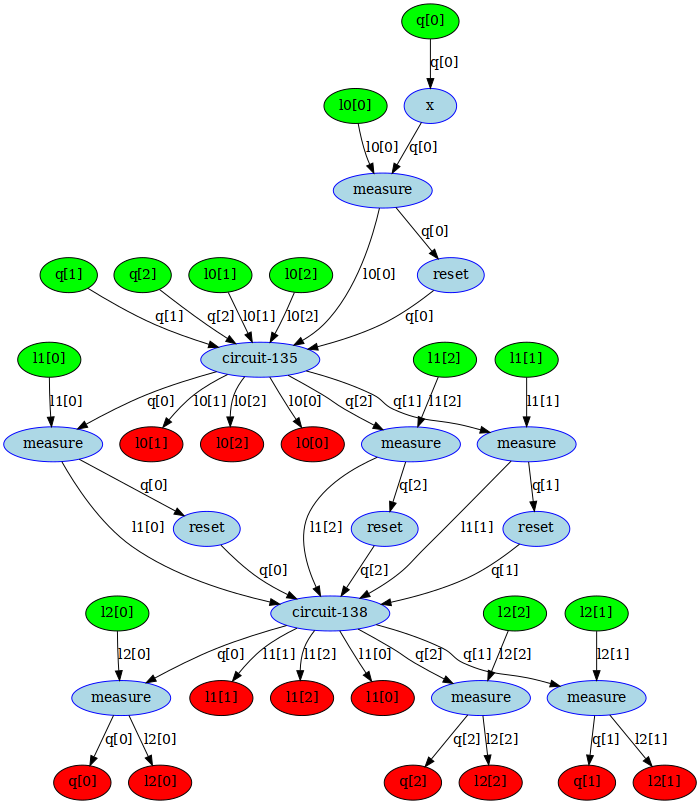

In [13]:
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer
dag = circuit_to_dag(main)
dag_drawer(dag)

In [7]:
from qiskit.providers.aer import AerSimulator
backend_sim = Aer.get_backend('qasm_simulator')
backend = AerSimulator()
job_sim = backend_sim.run(transpile(main, backend_sim), shots=288)
result_sim = job_sim.result()
counts = result_sim.get_counts(main)
print(counts)

{'010 010 001': 45, '001 010 001': 37, '010 001 001': 16, '100 001 001': 66, '001 001 001': 74, '100 010 001': 50}


In [8]:
with open("myfile.txt", 'w') as f: 
    for key, value in counts.items(): 
        f.write('%s:%s\n' % (key, value))

In [9]:
n_qubits = 5
qc_list = []
for i in range(5):
    main = QuantumCircuit(qreg_q, reg0,reg1,reg2)
    level_1=Three_Edge_Uniform_Level(theta_0)
    level_2=Three_Edge_Uniform_Level(theta_1)
    main.x(qreg_q[0])
    main.measure(qreg_q[0],reg0[0])
    main.reset(qreg_q[0])
    main.append(level_1, [qreg_q[0], qreg_q[1], qreg_q[2]],[reg0[0],reg0[1],reg0[2]])
    main.measure(qreg_q[0], reg1[0])
    main.measure(qreg_q[2], reg1[2])
    main.measure(qreg_q[1], reg1[1])
    main.reset(qreg_q[1])
    main.reset(qreg_q[2])
    main.reset(qreg_q[0])
    main.append(level_2, [qreg_q[0], qreg_q[1], qreg_q[2]],[reg1[0],reg1[1],reg1[2]])
    main.measure(qreg_q[0], reg2[0])
    main.measure(qreg_q[2], reg2[2])
    main.measure(qreg_q[1], reg2[1])
    qc_list.append(main)

001 001 001
001 001 001
001 001 001
001 001 001
100 001 001


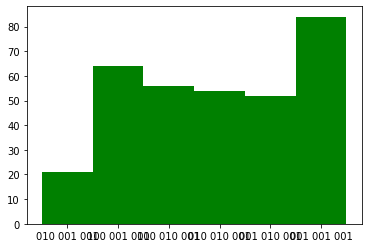

In [11]:
# Add to your import statements
from qiskit.compiler import transpile, assemble
import matplotlib.pyplot as plt

# After creating qc_list
backend = Aer.get_backend('qasm_simulator')
transpiled_circs = transpile(qc_list, backend=backend)
qobjs = assemble(transpiled_circs, backend=backend)
job_info = backend.run(qobjs,shots=288)

# To get the results
for circ_index in range(len(transpiled_circs)):
    plt.bar((job_info.result().get_counts(transpiled_circs[circ_index])).keys(), (job_info.result().get_counts(transpiled_circs[circ_index])).values(), 1, color='g')
    print(max((job_info.result().get_counts(transpiled_circs[circ_index])),key=(job_info.result().get_counts(transpiled_circs[circ_index])).get))